# How to Use the Library

This free algebra library creates a way for you to represent equations within a term algebra. It doesn't assume any properties in the algebra and it has a way to create a DAG containing only unique instances of the terms. The idea is that this library is supposed to be used for Unification algorithms.

## Setting up

In [1]:
from algebra import *

It's recommended that you set up your constants, variables, and functions ahead of time

In [2]:
f = Function("f", arity = 2)
g = Function("g", 2)
x = Variable("x")
y = Variable("y")
z = Variable("z")
a = Constant("a")
b = Constant("b")
c = Constant("c")

The functions `f` and `g` are not terms by themselves. You need to instantiate them with their arguments.

In [3]:
f1 = f(x, a)
g1 = f(a, b)

You can print terms

In [4]:
print(f1)

f(x, a)


If you try to instantiate a term from a function with the incorrect number of arguments, you'll get an error

In [5]:
try:
    f2 = f(x, x, x)
    print(f2)
except:
    print("Error Occured")

Error Occured


## Equations

Equations are currently only a container that holds two terms

In [6]:
e1 = Equation(f1, g1)
print(e1)

f(x, a) = f(a, b)


## TermDAG

Most of the functionality in the library is in the DAG implementation. The goal of this library is to represent terms in a DAG such that structured is shared and each subterm appears only once.

In [7]:
dag1 = TermDAG(f(g(a, x), b))

You can visualize the DAGs

/home/rozek/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


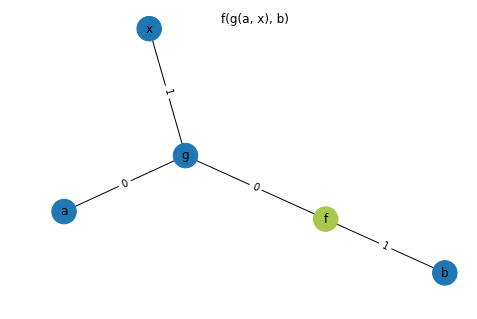

In [8]:
dag1.show()

Some notes:
- The edges are annotated with which argument position the term is in.
- The root node is colored green.
- The whole term is listed on the top

You can traverse the graph with the following function calls

In [9]:
# Depth First Edge Traversal
## Returns a list of edges (node, node)
t1 = dag1.df_edge_traversal()

# Depth First Node Traversal
## Returns a list of nodes
t2 = dag1.df_node_traversal()

# Breadth First Edge Traversal
## Returns a list of edges (node, node)
t3 = dag1.bs_edge_traversal()

# Breadth First Node Traversal
## Returns a list of nodes
t4 = dag1.bs_node_traversal()

Then to traversal, just use the standard Python notation

In [10]:
for edge in t1:
    print(edge)

(f(g(a, x), b), g(a, x))
(g(a, x), a)
(g(a, x), x)
(f(g(a, x), b), b)


## Occurance Check

It's easy to check if a term exists within another term

In [11]:
x in f(x, a)

True

In [12]:
y in f(x, a)

False

## Substitutions

Currently substitutions are supported for Terms (not TermDAGs)
Substitutions are stored and then applied to a term via multiplication

In [13]:
sigma = SubstituteTerm()
# Add the mapping x -> a
sigma.add(x, a)
sigma.add(y, a)
sigma.add(z, c)
print(sigma)

{
  y↦a,
  z↦c,
  x↦a
}


In [14]:
# Apply the substitution to the term f(x, b)
f(x, b) * sigma

f(a, b)

### Useful Methods

Replace a substitution

In [15]:
sigma.replace(x, b)
print(sigma)

{
  z↦c,
  x↦b,
  y↦a
}


Delete a substitution

In [16]:
sigma.remove(x)
print(sigma)

{
  z↦c,
  y↦a
}


Get the domain and range of a substiution

In [17]:
print("Domain: ", sigma.domain())
print("Range: ", sigma.range())

Domain:  (z, y)
Range:  (c, a)


### Composing Substitutions

You can compose substitutions $\sigma_1$ and $\sigma_2$.

In [18]:
sigma1 = SubstituteTerm()
sigma1.add(x, f(y, a))
sigma2 = SubstituteTerm()
sigma2.add(y, b)
print(sigma1 * sigma2)

{
  y↦b,
  x↦f(b, a)
}


As you can see above, the substitutions in $\sigma_2$ got applied to $\sigma_1$. You can still apply it to a term in the same line.

In [19]:
g(x,b) * sigma1 * sigma2

g(f(b, a), b)